<a href="https://colab.research.google.com/github/yakupusame/Credit-Card-Fraud/blob/master/Credit_Card_Fraud(catboost).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.shape

(284807, 31)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()


In [6]:
scaled_time = df['Time']
scaled_amount = df['Amount']
df.drop(['Time','Amount'],axis=1,inplace=True)

In [7]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [8]:
scaled_amount = pd.DataFrame(scaled_amount)
scaled_time = pd.DataFrame(scaled_time)

In [9]:
scaled_amount=scaler.fit_transform(scaled_amount)

In [10]:
scaled_time=scaler.fit_transform(scaled_time)

In [11]:
df['scaled_time']= scaled_time
df['scaled_amount']= scaled_amount

In [12]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-0.994983,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.994983,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-0.994972,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-0.994972,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.994960,0.670579


In [13]:
x = df.loc[:, df.columns != 'Class']
y = df['Class']

In [14]:
y.tail(10)

284797    0
284798    0
284799    0
284800    0
284801    0
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, dtype: int64

In [15]:
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,scaled_time,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,-0.994983,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.994983,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,-0.994972,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,-0.994972,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.994960,0.670579


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=123)


In [17]:
print(x_train)
print(y_train)
print(x_test)
print(y_test)

              V1        V2        V3  ...       V28  scaled_time  scaled_amount
9057    1.223528  0.726064 -0.192303  ...  0.030803    -0.846356      -0.293440
197407 -1.531257 -0.845410 -0.661207  ... -0.082430     0.555810      -0.167819
257714  2.302551 -1.410263 -1.301974  ... -0.060548     0.864895      -0.027947
201302  1.809691  0.232969  0.312680  ... -0.035744     0.577215      -0.167819
167965 -2.449361  2.602426 -2.648017  ... -0.025988     0.402977      -0.293440
...          ...       ...       ...  ...       ...          ...            ...
192476  2.085321 -1.119472 -0.260414  ... -0.054809     0.528930       0.006847
17730  -1.039001  0.950070  0.389899  ...  0.062423    -0.655823      -0.223713
28030   1.129333  0.471653  0.657500  ...  0.021002    -0.585921      -0.139873
277869  1.636784 -0.560857 -1.944589  ... -0.001004     0.977631       2.542723
249342  1.906410 -0.531680 -1.175688  ... -0.060711     0.818513       0.590233

[199364 rows x 30 columns]
9057      0


In [18]:
from sklearn.linear_model import LogisticRegression
classifier_logistic = LogisticRegression()
classifier_logistic.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred_logistic = classifier_logistic.predict(x_test)
cm = confusion_matrix(y_pred_logistic,y_test)
print(cm)

[[85264    64]
 [   19    96]]


In [20]:
accuracy_score(y_pred_logistic,y_test)

0.9990285921608558

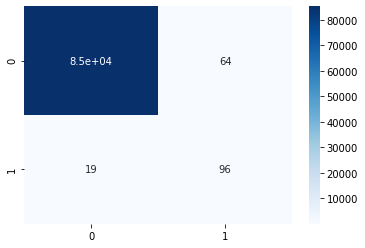

In [21]:
sns.heatmap(cm,annot=True,cmap="Blues")

In [22]:
print(classification_report(y_pred_logistic,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85328
           1       0.60      0.83      0.70       115

    accuracy                           1.00     85443
   macro avg       0.80      0.92      0.85     85443
weighted avg       1.00      1.00      1.00     85443



In [23]:
#Under sampling method 1
from imblearn.under_sampling import NearMiss
x = df.loc[:, df.columns != 'Class']
y = df['Class']

nm = NearMiss()
x_resample,y_resample = nm.fit_sample(x,y)

print(y_resample.shape)
print(x_resample.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

(984,)
(984, 30)


In [24]:
x_train_resampled,x_test_resampled,y_train_resampled,y_test_resampled = train_test_split(x_resample,y_resample,test_size = 0.3,random_state = 123)

In [25]:
classifier_logistic_resampled = LogisticRegression()
classifier_logistic_resampled.fit(x_train_resampled,y_train_resampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
y_pred_logistic_resampled = classifier_logistic_resampled.predict(x_test_resampled)
cm = confusion_matrix(y_pred_logistic_resampled,y_test_resampled)
print(cm)

[[152  11]
 [  3 130]]


In [27]:
print(accuracy_score(y_pred_logistic_resampled,y_test_resampled))

0.9527027027027027


In [28]:
print(classification_report(y_pred_logistic_resampled,y_test_resampled))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96       163
           1       0.92      0.98      0.95       133

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296



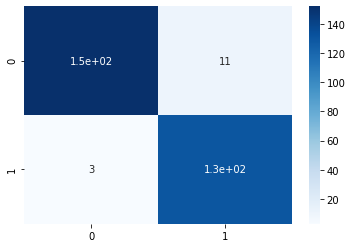

In [29]:
sns.heatmap(cm,annot=True,cmap="Blues")

In [30]:
print(y_train.value_counts())
print(y_test.value_counts())


0    199032
1       332
Name: Class, dtype: int64
0    85283
1      160
Name: Class, dtype: int64


In [31]:
#SMOTE METHOD NOW
from imblearn.over_sampling import SMOTE
smote= SMOTE()
x_train_smote,y_train_smote = smote.fit_sample(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [36]:
#!pip install catboost
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=100,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = 2018,
                             od_type='Iter',
                             metric_period = 1,
                             od_wait=100)

In [37]:
model.fit(x_train_smote,y_train_smote)
pred_smote = model.predict(x_test)
print(accuracy_score(pred_smote,y_test))

Learning rate set to 0.5
0:	total: 901ms	remaining: 1m 29s
1:	total: 1.71s	remaining: 1m 23s
2:	total: 2.57s	remaining: 1m 23s
3:	total: 3.38s	remaining: 1m 21s
4:	total: 4.2s	remaining: 1m 19s
5:	total: 4.97s	remaining: 1m 17s
6:	total: 5.8s	remaining: 1m 17s
7:	total: 6.56s	remaining: 1m 15s
8:	total: 7.32s	remaining: 1m 14s
9:	total: 8.09s	remaining: 1m 12s
10:	total: 8.84s	remaining: 1m 11s
11:	total: 9.66s	remaining: 1m 10s
12:	total: 10.4s	remaining: 1m 9s
13:	total: 11.2s	remaining: 1m 8s
14:	total: 12s	remaining: 1m 8s
15:	total: 12.8s	remaining: 1m 7s
16:	total: 13.6s	remaining: 1m 6s
17:	total: 14.3s	remaining: 1m 5s
18:	total: 15.1s	remaining: 1m 4s
19:	total: 15.9s	remaining: 1m 3s
20:	total: 16.7s	remaining: 1m 2s
21:	total: 17.5s	remaining: 1m 1s
22:	total: 18.2s	remaining: 1m 1s
23:	total: 19s	remaining: 1m
24:	total: 19.8s	remaining: 59.3s
25:	total: 20.5s	remaining: 58.4s
26:	total: 21.2s	remaining: 57.3s
27:	total: 21.9s	remaining: 56.2s
28:	total: 22.5s	remaining: 55

In [38]:
cm = confusion_matrix(pred_smote,y_test)
cm

array([[85200,    22],
       [   83,   138]])

In [39]:
print(classification_report(pred_smote,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85222
           1       0.86      0.62      0.72       221

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

